In [1]:
import mph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
client = mph.start()
file='planar_pcb_coil_arbit.mph'
model = client.load(file)
client.models()
model.parameters(file)

[0.005s][warning][os,thread] Attempt to protect stack guard pages failed (0x000000016b6e8000-0x000000016b6f4000).
[0.005s][warning][os,thread] Attempt to deallocate stack guard pages failed.


{'atx': 3e-06, 'current': 0.001, 'aty': 3e-06, 'atz': 1e-06, 'Voltage': 1.0}

In [12]:
#to change parameters
Voltage =  10 #Voltage in V
d  =  0.03 #distance for B in µm
Vol = str(Voltage) + '[V]'
d_x, d_y, d_z = str(d) + '[µm]', str(d) + '[µm]', str(d) + '[µm]'
model.parameter('atx', d_x)
model.parameter('aty', d_y)
model.parameter('atz', d_z)
model.parameter('Voltage', Vol)
model.parameters()
model.solve()
model.export('Plot Bx', 'Bx.csv')
model.export('Plot By', 'By.csv')
model.export('Plot Bz', 'Bz.csv')
model.export('J', 'J.csv')

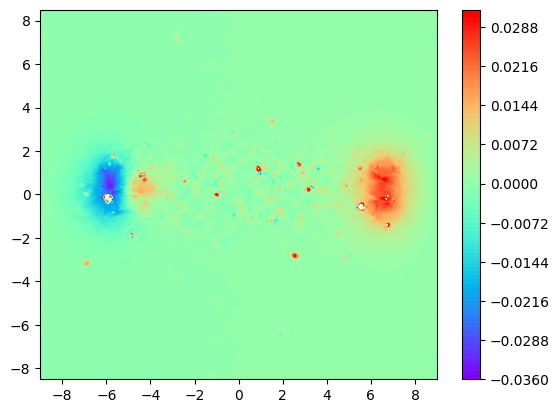

In [13]:
datax = pd.read_csv('Bx.csv', sep=";")
dataxx = datax.drop(range(7))
dfx=dataxx
dfx=dfx['% Model,planar_pcb_coil_arbit.mph']
dfx=dfx.str.split(',', expand=True)
dfx = dfx.rename(columns={0: 'x', 1: 'y', 2: 'z', 3: 'Bx'})
x, y, z = dfx['x'].to_numpy(), dfx['y'].to_numpy(), dfx['Bx'].to_numpy()

X, Y, Z=[], [], []
for i in range(len(x)):
    X.append(float(x[i]))
    Y.append(float(y[i]))
    Z.append(float(z[i]))
x, y, z = X, Y, Z
# create x-y points to be used in heatmap
xi = np.linspace(float(min(X)), float(max(X)), 1000)
yi = np.linspace(float(min(Y)), float(max(Y)), 1000)

# Interpolate for plotting
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

# I control the range of my colorbar by removing data 
# outside of my range of interest
zmin = float(min(Z))
zmax = float(max(Z))
zi[(zi<zmin) | (zi>zmax)] = None

# Create the contour plot
CS = plt.contourf(xi, yi, zi, 100, cmap=plt.cm.rainbow,
                  vmax=zmax, vmin=zmin)
plt.colorbar()  
plt.show()


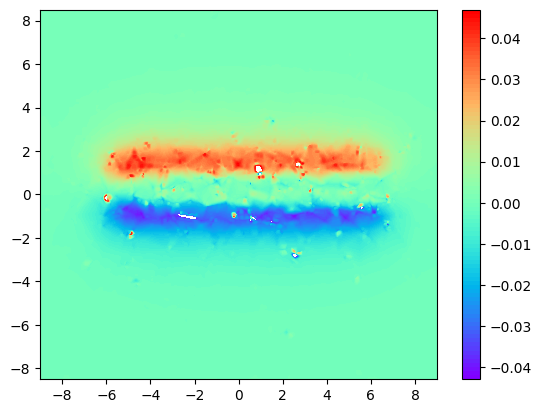

In [14]:
datay = pd.read_csv('By.csv', sep=";")
datayy = datay.drop(range(7))
dfy=datayy
dfy=dfy['% Model,planar_pcb_coil_arbit.mph']
dfy=dfy.str.split(',', expand=True)
dfy = dfy.rename(columns={0: 'x', 1: 'y', 2: 'z', 3: 'By'})
x, y, z = dfy['x'].to_numpy(), dfy['y'].to_numpy(), dfy['By'].to_numpy()

X, Y, Z=[], [], []
for i in range(len(x)):
    X.append(float(x[i]))
    Y.append(float(y[i]))
    Z.append(float(z[i]))
x, y, z = X, Y, Z
# create x-y points to be used in heatmap
xi = np.linspace(float(min(X)), float(max(X)), 1000)
yi = np.linspace(float(min(Y)), float(max(Y)), 1000)

# Interpolate for plotting
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

# I control the range of my colorbar by removing data 
# outside of my range of interest
zmin = float(min(Z))
zmax = float(max(Z))
zi[(zi<zmin) | (zi>zmax)] = None

# Create the contour plot
CS = plt.contourf(xi, yi, zi, 100, cmap=plt.cm.rainbow,
                  vmax=zmax, vmin=zmin)
plt.colorbar()  
plt.show()


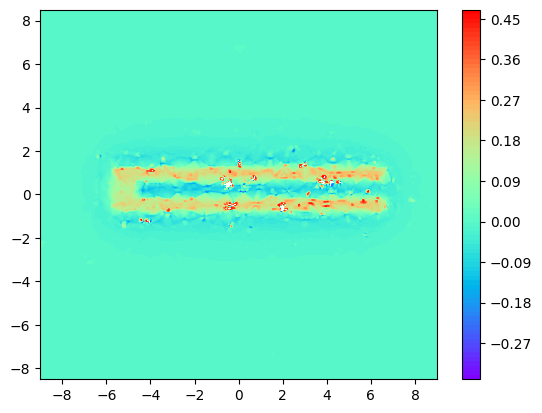

In [15]:
dataz = pd.read_csv('Bz.csv', sep=";")
datazz = dataz.drop(range(7))
dfz=datazz
dfz=dfz['% Model,planar_pcb_coil_arbit.mph']
dfz=dfz.str.split(',', expand=True)
dfz = dfz.rename(columns={0: 'x', 1: 'y', 2: 'z', 3: 'Bz'})
x, y, z = dfz['x'].to_numpy(), dfz['y'].to_numpy(), dfz['Bz'].to_numpy()

X, Y, Z=[], [], []
for i in range(len(x)):
    X.append(float(x[i]))
    Y.append(float(y[i]))
    Z.append(float(z[i]))

x, y, z = X, Y, Z
# create x-y points to be used in heatmap
xi = np.linspace(float(min(X)), float(max(X)), 1000)
yi = np.linspace(float(min(Y)), float(max(Y)), 1000)

# Interpolate for plotting
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

# I control the range of my colorbar by removing data 
# outside of my range of interest
zmin = float(min(Z))
zmax = float(max(Z))
zi[(zi<zmin) | (zi>zmax)] = None

# Create the contour plot
CS = plt.contourf(xi, yi, zi, 100, cmap=plt.cm.rainbow,
                  vmax=zmax, vmin=zmin)
plt.colorbar()  
plt.show()


In [8]:
dataJ = pd.read_csv('J.csv', sep=";")
dataJJ= dataJ.drop(range(7))
dfJ=dataJJ
dfJ=dfJ['% Model,planar_pcb_coil_orig.mph']
dfJ=dfJ.str.split(',', expand=True)
dfJ = dfJ.rename(columns={0: 'x', 1: 'y', 2: 'z', 3: 'Jx', 4: 'Jy', 5: 'Jz'})
x, y, z, Jx, Jy, Jz = dfJ['x'].to_numpy(), dfJ['y'].to_numpy(), dfJ['z'].to_numpy(), dfJ['Jx'].to_numpy(), dfJ['Jy'].to_numpy(), dfJ['Jz'].to_numpy()

X, Y, Z, JX, JY, JZ =[], [], [], [], [], []
for i in range(len(x)):
    X.append(float(x[i]))
    Y.append(float(y[i]))
    Z.append(float(z[i]))
    JX.append(float(Jx[i]))
    JY.append(float(Jy[i]))
    JZ.append(float(Jz[i]))

x, y, z, Jx, Jy, Jz = X, Y, Z, JX, JY, JZ   
    
dfJ


,x,y,z,Jx,Jy,Jz
7,-4.3127975088999175,-0.625,0,2336486.0192668117,-56054.47459627135,-690661.6530950292
8,-4.3127975088999175,-0.875,0,2333784.0269874427,57341.66144708627,-690630.9507435816
9,-5.610645578976904,-1.125,0,253019.67362825066,175595.7064568082,-253251.0631112745
10,-5.610645578976904,-1.375,0,42975.952043522,33739.207444044936,-249951.443104851
11,-5.870215192992301,-1.375,0,49010.957888968216,-30670.727511815676,-247497.3831270039
...,...,...,...,...,...,...
542,-2.625,-0.875,0,2328063.481462275,-2328171.8009412945,727746.5421808827
543,-1.8749999999999998,-0.625,0,2328045.461529795,-2328143.736602547,2447666.95171448
544,-1.625,-0.875,0,2328031.867441533,-2328774.0346070104,2508231.1637126454
545,-1.625,-0.625,0,2327760.5935798697,-2326978.551676459,2538880.2143159406


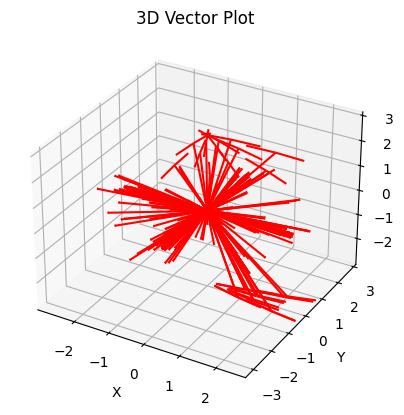

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for i in range(len(X)):
    ax.quiver(X[i], Y[i], Z[i], JX[i], JY[i], JZ[i], color='r', arrow_length_ratio=0.01)



Jxmin = float(min(JX))
Jxmax = float(max(JX))
Jymin = float(min(JY))
Jymax = float(max(JY))
Jzmin = float(min(JZ))
Jzmax = float(max(JZ))
ax.set_xlim([Jxmin, Jxmax])
ax.set_ylim([Jymin, Jymax])
ax.set_zlim([Jzmin, Jzmax])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Vector Plot')

plt.show()

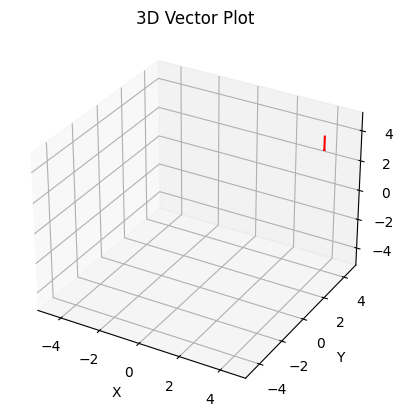

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#v1 = np.array([1, 2, 3])
#v2 = np.array([-2, 1, 4])

#VECTOR 1
ax.quiver(4, 4, 4, 0, 0, -1, color='r', arrow_length_ratio=0.1)
#VECTOR 2
#ax.quiver(1, 1, 1, 2, 2, 2, color='b', arrow_length_ratio=0.1)

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Vector Plot')

plt.show()

In [37]:
z

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0